In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# EDA and Data Cleaning

In [2]:
#import file
crypto_data = pd.read_csv("crypto_data.csv")
crypto_data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [4]:
#drop coins where IsTrading is False and remove column
crypto_df = crypto_data.loc[crypto_data['IsTrading'] == True]
crypto_df = crypto_df.drop(columns = 'IsTrading')

In [5]:
#drop coins where Algorithm is N/A
crypto_df = crypto_df.loc[crypto_df['Algorithm'] != 'N/A']

In [6]:
#drop coins with no coin mined
trading_mask = crypto_df.TotalCoinsMined > 0
crypto_df = crypto_df.loc[trading_mask].reset_index(drop=True)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


In [7]:
#convert TotalCoinSupply to float
crypto_df["TotalCoinSupply"] = pd.to_numeric(crypto_df.TotalCoinSupply)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(4)
memory usage: 25.1+ KB


In [8]:
crypto_df.ProofType.value_counts()

PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
PoW/nPoS                  1
LPoS                      1
PoST                      1
PoS/PoW/PoT               1
PoW and PoS               1
PoW/PoW                   1
PoW/PoS                   1
Zero-Knowledge Proof      1
Proof of Authority        1
HPoW                      1
PoS/LPoS                  1
PoA                       1
Pos                       1
POBh                      1
dPoW/PoW                  1
Proof of Trust            1
TPoS                      1
PoW + Hive                1
DPOS                      1
Name: ProofType, dtype: int64

In [9]:
#combine like records
crypto_df.loc[crypto_df.ProofType == "PoW/PoS ", "ProofType"] = "PoW/PoS"
crypto_df.loc[crypto_df.ProofType == "Pos", "ProofType"] = "PoS"
crypto_df.loc[crypto_df.ProofType == "Proof of Authority", "ProofType"] = "PoA"
crypto_df.loc[crypto_df.ProofType == "PoW and PoS", "ProofType"] = "PoW/PoS"
crypto_df.loc[crypto_df.ProofType == "Proof of Trust", "ProofType"] = "PoT"

In [10]:
crypto_df.ProofType.value_counts()

PoW                     237
PoW/PoS                 178
PoS                      87
DPoS                      9
PoC                       3
PoS/PoW                   2
PoA                       2
PoW/nPoS                  1
Zero-Knowledge Proof      1
PoST                      1
PoS/PoW/PoT               1
PoT                       1
PoW/PoW                   1
HPoW                      1
LPoS                      1
PoS/LPoS                  1
POBh                      1
dPoW/PoW                  1
TPoS                      1
PoW + Hive                1
DPOS                      1
Name: ProofType, dtype: int64

In [11]:
cryto_coins = crypto_df.CoinName

crypto_new = crypto_df.drop(["Unnamed: 0", "CoinName"],axis=1)
crypto_new.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


# Dimensionality Reduction

In [12]:
crypto_new = pd.get_dummies(crypto_new)
crypto_new.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
#scale the data
scaler = StandardScaler()
scaler = scaler.fit(crypto_new)

In [14]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_new)
tsne_features.shape

(532, 2)

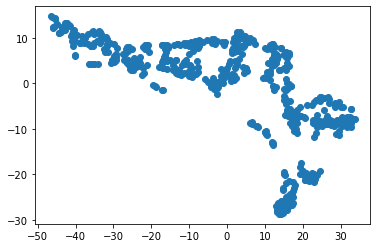

In [15]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# PCA

In [16]:
pca = PCA()
pca.fit(crypto_new)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[8.75717060e-01 1.24282940e-01 5.88914043e-23 3.86488120e-23
 3.04741286e-23 1.67519737e-23 1.03968178e-23 5.03794807e-24
 4.71157873e-24 4.33604849e-24 4.06120296e-24 3.31604846e-24
 3.08418177e-24 2.78820604e-24 2.59091747e-24 2.53497960e-24
 2.10788008e-24 1.89104022e-24 1.62514145e-24 1.35835988e-24
 1.12906993e-24 1.12906992e-24 1.12903579e-24 1.12876168e-24
 1.12198575e-24 1.08055418e-24 9.71462200e-25 9.20737330e-25
 8.99671571e-25 8.47299850e-25 8.43749895e-25 8.06325269e-25
 7.78734231e-25 7.21230261e-25 6.67605730e-25 5.68281342e-25
 5.64535183e-25 5.64534996e-25 5.64534960e-25 5.64534925e-25
 5.64534739e-25 5.63712723e-25 5.60721785e-25 5.57884742e-25
 5.40677146e-25 5.19563965e-25 4.21667030e-25 3.71722494e-25
 2.82267666e-25 2.82267649e-25 2.82267519e-25 2.82267487e-25
 2.82267487e-25 2.82267487e-25 2.82267480e-25 2.82267480e-25
 2.82267480e-25 2.82267480e-25 2.82267480e-25 2.82267480e-25
 2.82267480e-25 2.82267480e-25 2.82267480e-25 2.82267480e-25
 2.82267480e-25 2.822674

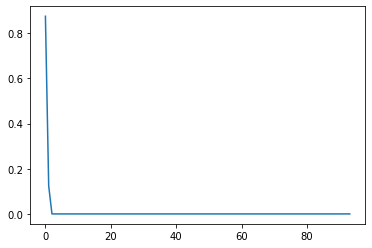

In [17]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

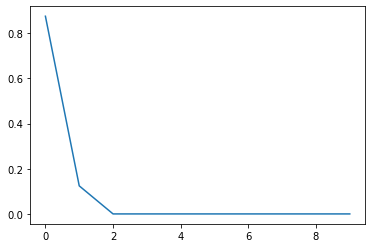

In [18]:
plt.plot(range(10), pca.explained_variance_ratio_[0:10])
plt.show()

In [19]:
pca = PCA(n_components=0.90)
pca.fit(crypto_new)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.87571706 0.12428294]
1.0


In [20]:
print(len(pca.explained_variance_ratio_))

2


In [21]:
PCA_df = pca.transform(crypto_new)
PCA_df = pd.DataFrame(PCA_df, columns = ["PCA"+ str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
PCA_df.head()

,PCA1,PCA2
0,-1.162934e+10,-5.502574e+08
1,-1.064088e+10,-1.197852e+09
2,2.750507e+11,1.312370e+11
3,-1.160219e+10,-5.552767e+08
4,-1.157548e+10,-6.435026e+08


In [22]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(PCA_df)
tsne_features.shape

(532, 2)

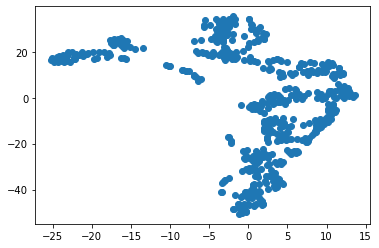

In [23]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Cluster Analysis with k-Means

C:\Users\19729\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


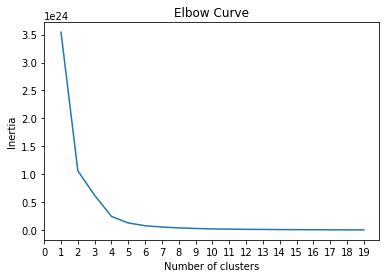

In [24]:
# Finding the best value for k
inertia = []
k = list(range(1, 20))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(PCA_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(PCA_df)

# Predict clusters
predictions = model.predict(PCA_df)

# Add the predicted class column to the dataframe
PCA_df["class"] = model.labels_
PCA_df.head()

,PCA1,PCA2,class
0,-1.162934e+10,-5.502574e+08,0
1,-1.064088e+10,-1.197852e+09,0
2,2.750507e+11,1.312370e+11,3
3,-1.160219e+10,-5.552767e+08,0
4,-1.157548e+10,-6.435026e+08,0


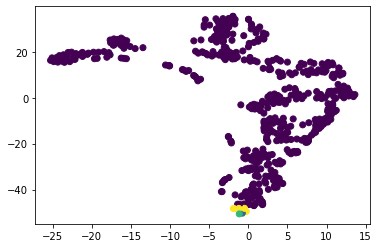

In [26]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=PCA_df["class"])
plt.show()

In [27]:
PCA_df["class"].value_counts()

0    524
3      6
1      1
2      1
Name: class, dtype: int64

# Recommendation

In [28]:
#Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered 
#together? If so, into how many clusters?

#### Yes, cryptocurrencies can be grouped together. Based on the elbow plot above I believe this set of crypo coins would fall into 4 groups. The largest group contains the majority of the coins (524). And 3 additional smaller groups were found. One with 6 coins and two with 1 coin each. 